In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#the above cell describes about data,input and output

In [3]:
#✅ To load and view the dataset
import pandas as pd

# Load training and test datasets
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Display the first few rows of the training data
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#description about data
# Open and read the contents of data_description.txt
with open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt', 'r') as file:
    description = file.read()

# Display the text
print(description)


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
# Basic structure and data types
print("📋 Dataset Info:")
print(train.info())
print("\n" + "-"*100)

# Summary statistics for numerical columns
print("📈 Summary Statistics:")
print(train.describe())
print("\n" + "-"*100)

# Null value check
print("🕳️ Missing Values:")
print(train.isnull().sum())



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64

In [6]:
'''Let’s start by working on the MSSubClass feature.

MSSubClass is a numerical code that represents the type of house or dwelling being sold.

Since house prices are often influenced by the type of dwelling, this feature could be important for predicting the target variable (SalePrice).

To prepare it for modeling:

We'll group the data by MSSubClass and calculate the average SalePrice for each category.

Then, we’ll sort the categories based on their average prices — from highest to lowest.

After that, we’ll apply Label Encoding, assigning smaller numeric values to lower-price categories and higher values to higher-price categories.

We choose Label Encoding here (instead of One-Hot Encoding) because there appears to be a natural order in house prices based on the subclass. One-Hot Encoding treats all categories as 
equally different, while Label Encoding can help the model capture this price-based ranking.'''

"Let’s start by working on the MSSubClass feature.\n\nMSSubClass is a numerical code that represents the type of house or dwelling being sold.\n\nSince house prices are often influenced by the type of dwelling, this feature could be important for predicting the target variable (SalePrice).\n\nTo prepare it for modeling:\n\nWe'll group the data by MSSubClass and calculate the average SalePrice for each category.\n\nThen, we’ll sort the categories based on their average prices — from highest to lowest.\n\nAfter that, we’ll apply Label Encoding, assigning smaller numeric values to lower-price categories and higher values to higher-price categories.\n\nWe choose Label Encoding here (instead of One-Hot Encoding) because there appears to be a natural order in house prices based on the subclass. One-Hot Encoding treats all categories as \nequally different, while Label Encoding can help the model capture this price-based ranking."

In [7]:
# Group by MSSubClass and calculate average SalePrice

subclass_price = train.groupby('MSSubClass')['SalePrice'].mean().sort_values(ascending=True)

# Display the sorted result
subclass_price

MSSubClass
30      95829.724638
180    102300.000000
45     108591.666667
190    129613.333333
90     133541.076923
160    138647.380952
50     143302.972222
85     147810.000000
40     156125.000000
70     166772.416667
80     169736.551724
20     185224.811567
75     192437.500000
120    200779.080460
60     239948.501672
Name: SalePrice, dtype: float64

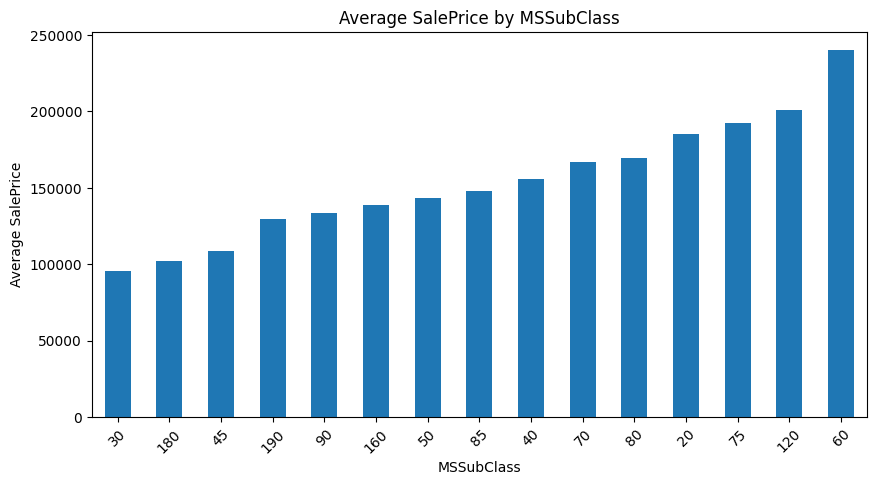

In [8]:
import matplotlib.pyplot as plt

subclass_price.plot(kind='bar', figsize=(10,5))
plt.title('Average SalePrice by MSSubClass')
plt.xlabel('MSSubClass')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.show()


In [9]:

# Create a dictionary mapping MSSubClass to labels
subclass_label_map = {subclass: idx for idx, subclass in enumerate(subclass_price.index)}


In [10]:
# Step 3: Replace the original MSSubClass in both datasets
train['MSSubClass'] = train['MSSubClass'].map(subclass_label_map)
test['MSSubClass'] = test['MSSubClass'].map(subclass_label_map)


In [11]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,14,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,11,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,14,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,9,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
#if the output is int then there is no null values 
print(train['MSSubClass'].dtype)

int64


In [13]:
#now lets go to next feature "MSZoning"
#description about that particular feature
'''MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density '''

'MSZoning: Identifies the general zoning classification of the sale.\n\t\t\n       A\tAgriculture\n       C\tCommercial\n       FV\tFloating Village Residential\n       I\tIndustrial\n       RH\tResidential High Density\n       RL\tResidential Low Density\n       RP\tResidential Low Density Park \n       RM\tResidential Medium Density '

In [14]:
# Check data type
print("📦 Data type of MSZoning:", train['MSZoning'].dtype)

# Check number of null values
print("🕳️ Null values in MSZoning:", train['MSZoning'].isnull().sum())

📦 Data type of MSZoning: object
🕳️ Null values in MSZoning: 0


In [15]:
#flow same like mssubclass
# Group by MSZoning and calculate average SalePrice

zoning_price = train.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=True)

# Display it
print(zoning_price)


MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64


In [16]:
# Create a mapping: higher price → higher label
zoning_label_map = {zone: idx for idx, zone in enumerate(zoning_price.index)}

# Show the map (optional)
print(zoning_label_map)


{'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}


In [17]:
# Apply label encoding to train and test datasets
train['MSZoning'] = train['MSZoning'].map(zoning_label_map)
test['MSZoning'] = test['MSZoning'].map(zoning_label_map)


In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,14,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,11,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,14,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,9,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
print("Updated dtype:", train['MSZoning'].dtype)
print("Nulls after encoding:", train['MSZoning'].isnull().sum())


Updated dtype: int64
Nulls after encoding: 0


In [20]:
#lets go to next feature "LotFrontage"

In [21]:
# Total number of rows
print("Total rows:", train.shape[0])

# Total number of null values in LotFrontage
print("Missing values in LotFrontage:", train['LotFrontage'].isnull().sum())


Total rows: 1460
Missing values in LotFrontage: 259


In [22]:
#to fill the null values
#LotFrontage basically depends on  LotArea, LotShape, LotConfig, etc.
''' Regression-Based Imputation
Train a regression model (like LinearRegression) to predict LotFrontage using features like LotArea, LotShape, etc.

More powerful, but a bit more complex '''

' Regression-Based Imputation\nTrain a regression model (like LinearRegression) to predict LotFrontage using features like LotArea, LotShape, etc.\n\nMore powerful, but a bit more complex '

In [23]:
#Let’s build a mini regression model to predict missing values of LotFrontage 
#using related features like LotArea, LotConfig, LotShape, Neighborhood, etc.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd

# Step 1: Fill missing values in the input features
train['LotShape'].fillna(train['LotShape'].mode()[0], inplace=True)
train['LotConfig'].fillna(train['LotConfig'].mode()[0], inplace=True)
train['Neighborhood'].fillna(train['Neighborhood'].mode()[0], inplace=True)
train['LotArea'].fillna(train['LotArea'].median(), inplace=True)

# Step 2: Define input features and dropna only for LotFrontage
features = ['LotArea', 'LotShape', 'LotConfig', 'Neighborhood']
clean_df = train[features + ['LotFrontage']].dropna()

# Step 3: Split into X and y
X_train = clean_df[features]
y_train = clean_df['LotFrontage']

# Step 4: Create preprocessing for categorical features
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns as-is
)

# Step 5: Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Step 6: Train the model
pipeline.fit(X_train, y_train)

# Step 7: Predict missing LotFrontage
missing_df = train[train['LotFrontage'].isnull()]
X_missing = missing_df[features]

# Step 8: Predict only if we have rows
if not X_missing.empty:
    predicted_lotfrontage = pipeline.predict(X_missing)
    train.loc[X_missing.index, 'LotFrontage'] = predicted_lotfrontage
    print("✅ Missing LotFrontage values predicted and filled.")
else:
    print("⚠️ No rows available for LotFrontage prediction.")

# Step 9: Check remaining nulls
print("Remaining missing LotFrontage values:", train['LotFrontage'].isnull().sum())


✅ Missing LotFrontage values predicted and filled.
Remaining missing LotFrontage values: 0


/tmp/ipykernel_13/3193597276.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LotShape'].fillna(train['LotShape'].mode()[0], inplace=True)
/tmp/ipykernel_13/3193597276.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [25]:
print("LotArea type:", train['LotArea'].dtype)
print("Missing values:", train['LotArea'].isnull().sum())

LotArea type: int64
Missing values: 0


In [26]:
print("street type:", train['Street'].dtype)
print("Missing values:", train['Street'].isnull().sum())

street type: object
Missing values: 0


In [27]:
# Unique categories
print("\nUnique values in Street:", train['Street'].unique())


Unique values in Street: ['Pave' 'Grvl']


In [28]:
# Compare average SalePrice
street_price = train.groupby('Street')['SalePrice'].mean().sort_values(ascending=False)
print("\nAverage SalePrice by Street type:\n", street_price)



Average SalePrice by Street type:
 Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64


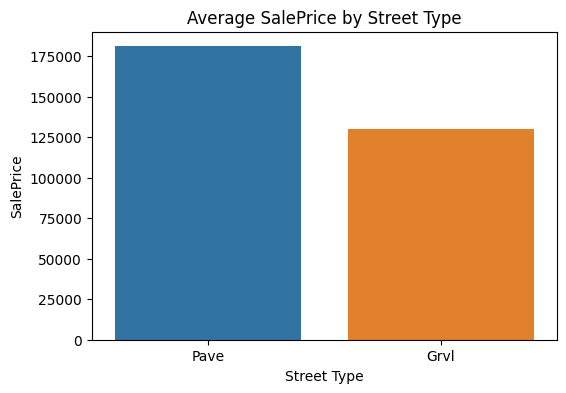

In [29]:
# Optional: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=street_price.index, y=street_price.values)
plt.title("Average SalePrice by Street Type")
plt.ylabel("SalePrice")
plt.xlabel("Street Type")
plt.show()

In [30]:
#✅ Code to do Label Encoding on Street:
# Group by 'Street' and calculate mean SalePrice
street_price = train.groupby('Street')['SalePrice'].mean().sort_values()

# Create a mapping: lower price gets 0, higher price gets 1
street_mapping = {category: idx for idx, category in enumerate(street_price.index)}

# Apply encoding to both train and test
train['Street_encoded'] = train['Street'].map(street_mapping)
test['Street_encoded'] = test['Street'].map(street_mapping)

# Check result
print("Encoding applied:\n", street_mapping)
print(train[['Street', 'Street_encoded']].head())


Encoding applied:
 {'Grvl': 0, 'Pave': 1}
  Street  Street_encoded
0   Pave               1
1   Pave               1
2   Pave               1
3   Pave               1
4   Pave               1


In [31]:
# Check data type of 'Alley'
print("Data Type:", train['Alley'].dtype)

# Check number of missing (null) values in 'Alley'
print("Missing Values:", train['Alley'].isnull().sum())
'''🧱 Real-world meaning:
Value	Meaning
Grvl	House has alley access with a gravel road
Pave	House has alley access with a paved road
NaN	🅰️ No alley access (the majority of houses) 

In our model:

We treat NaN as a valid category called 'NoAlley'

Then we check which category usually has higher SalePrice, and encode accordingly. '''

Data Type: object
Missing Values: 1369


"🧱 Real-world meaning:\nValue\tMeaning\nGrvl\tHouse has alley access with a gravel road\nPave\tHouse has alley access with a paved road\nNaN\t🅰️ No alley access (the majority of houses) \n\nIn our model:\n\nWe treat NaN as a valid category called 'NoAlley'\n\nThen we check which category usually has higher SalePrice, and encode accordingly. "

In [32]:
# Step 1: Fill NaNs with a meaningful category
train['Alley'] = train['Alley'].fillna('NoAlley')
test['Alley'] = test['Alley'].fillna('NoAlley')

In [33]:

# Step 2: Group by Alley and calculate average SalePrice
alley_price = train.groupby('Alley')['SalePrice'].mean().sort_values()

# Display the average prices
print("Average SalePrice by Alley type:\n", alley_price)

Average SalePrice by Alley type:
 Alley
Grvl       122219.080000
Pave       168000.585366
NoAlley    183452.131483
Name: SalePrice, dtype: float64


In [34]:
# Step 3: Create label encoding based on ascending price
alley_mapping = {category: idx for idx, category in enumerate(alley_price.index)}

# Step 4: Apply the mapping to train and test sets
train['Alley_encoded'] = train['Alley'].map(alley_mapping)
test['Alley_encoded'] = test['Alley'].map(alley_mapping)

# Step 5: Verify
print("\nLabel encoding mapping:\n", alley_mapping)
print(train[['Alley', 'Alley_encoded']].head())


Label encoding mapping:
 {'Grvl': 0, 'Pave': 1, 'NoAlley': 2}
     Alley  Alley_encoded
0  NoAlley              2
1  NoAlley              2
2  NoAlley              2
3  NoAlley              2
4  NoAlley              2


In [35]:
# Check data type
print("Data Type:", train['LotShape'].dtype)

# Check for missing (null) values
print("Missing Values:", train['LotShape'].isnull().sum())

# Check unique values
print("Unique Values:", train['LotShape'].unique())


Data Type: object
Missing Values: 0
Unique Values: ['Reg' 'IR1' 'IR2' 'IR3']


In [36]:
# Check average price for each shape
lotshape_price = train.groupby('LotShape')['SalePrice'].mean().sort_values()
print(lotshape_price)


LotShape
Reg    164754.818378
IR1    206101.665289
IR3    216036.500000
IR2    239833.365854
Name: SalePrice, dtype: float64


In [37]:
# Step 2: Create a mapping from category to label
lotshape_mapping = {category: idx for idx, category in enumerate(lotshape_price.index)}

# Step 3: Apply mapping to train and test datasets
train['LotShape_encoded'] = train['LotShape'].map(lotshape_mapping)
test['LotShape_encoded'] = test['LotShape'].map(lotshape_mapping)

# Step 4: Display the mapping and a sample
print("LotShape → Label Mapping:\n", lotshape_mapping)
print("\nSample Encoded Column:")
print(train[['LotShape', 'LotShape_encoded']].head())


LotShape → Label Mapping:
 {'Reg': 0, 'IR1': 1, 'IR3': 2, 'IR2': 3}

Sample Encoded Column:
  LotShape  LotShape_encoded
0      Reg                 0
1      Reg                 0
2      IR1                 1
3      IR1                 1
4      IR1                 1


In [38]:
print("Data Type:", train['LandContour'].dtype)
print("Missing Values:", train['LandContour'].isnull().sum())
print("Unique Values:", train['LandContour'].unique())


Data Type: object
Missing Values: 0
Unique Values: ['Lvl' 'Bnk' 'Low' 'HLS']


In [39]:
contour_price = train.groupby('LandContour')['SalePrice'].mean().sort_values()
print(contour_price)


LandContour
Bnk    143104.079365
Lvl    180183.746758
Low    203661.111111
HLS    231533.940000
Name: SalePrice, dtype: float64


In [40]:
# Create mapping
landcontour_mapping = {cat: i for i, cat in enumerate(contour_price.index)}

# Apply mapping
train['LandContour_encoded'] = train['LandContour'].map(landcontour_mapping)
test['LandContour_encoded'] = test['LandContour'].map(landcontour_mapping)

# Show the result
print("LandContour → Label Mapping:\n", landcontour_mapping)
print(train[['LandContour', 'LandContour_encoded']].head())


LandContour → Label Mapping:
 {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}
  LandContour  LandContour_encoded
0         Lvl                    1
1         Lvl                    1
2         Lvl                    1
3         Lvl                    1
4         Lvl                    1


In [41]:
print("📌 Data Type:", train['Utilities'].dtype)
print("❓ Missing Values:", train['Utilities'].isnull().sum())
print("🔎 Unique Values:", train['Utilities'].unique())


📌 Data Type: object
❓ Missing Values: 0
🔎 Unique Values: ['AllPub' 'NoSeWa']


In [42]:
print(train['Utilities'].value_counts())

#lets drop this column because there is only one single input for nosewa

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


In [43]:
#i am training the model with AllPub,NoSeWa .but what if the test case contains  NoSewr or ELO
#for that we used get() as shown


In [44]:
# Safe mapping for Utilities feature
utilities_map = {'AllPub': 1, 'NoSeWa': 0}

# Apply to train set
train['Utilities'] = train['Utilities'].map(lambda x: utilities_map.get(x, 0)).astype(bool)

# Apply to test set
test['Utilities'] = test['Utilities'].map(lambda x: utilities_map.get(x, 0)).astype(bool)


In [45]:
#what about previous feature we didn't cared about unknown features
#lets work on it

In [46]:
# Function to create safe mapping based on SalePrice and apply label encoding
def safe_label_encoding(df_train, df_test, column):
    # Create mapping from lowest to highest average SalePrice
    order = df_train.groupby(column)['SalePrice'].mean().sort_values().index
    mapping = {k: v for v, k in enumerate(order)}
    
    # Apply mapping safely (fallback to 0 if unknown)
    df_train[column] = df_train[column].map(lambda x: mapping.get(x, 0))
    df_test[column] = df_test[column].map(lambda x: mapping.get(x, 0))

# -------------------------
# 1. MSSubClass
# (Special case: numerical values, so we treat as categories temporarily)
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)
safe_label_encoding(train, test, 'MSSubClass')

# -------------------------
# 2. MSZoning
safe_label_encoding(train, test, 'MSZoning')

# -------------------------
# 3. Street
safe_label_encoding(train, test, 'Street')

# -------------------------
# 4. Alley
safe_label_encoding(train, test, 'Alley')

# -------------------------
# 5. LotShape
safe_label_encoding(train, test, 'LotShape')

# -------------------------
# 6. LandContour
safe_label_encoding(train, test, 'LandContour')

# -------------------------
# 7. Utilities — Custom handling (convert to boolean)
utilities_map = {'AllPub': 1, 'NoSeWa': 0}
train['Utilities'] = train['Utilities'].map(lambda x: utilities_map.get(x, 0)).astype(bool)
test['Utilities'] = test['Utilities'].map(lambda x: utilities_map.get(x, 0)).astype(bool)


In [47]:
print("Datatype:", train['LotConfig'].dtype)
print("Null values:", train['LotConfig'].isnull().sum())
print("Unique values:", train['LotConfig'].unique())


Datatype: object
Null values: 0
Unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


In [48]:
# Step 1: Group by LotConfig and compute average SalePrice
lotconfig_price = train.groupby('LotConfig')['SalePrice'].mean().sort_values()

# Step 2: Print the sorted prices by LotConfig category
print(lotconfig_price)


LotConfig
Inside     176938.047529
FR2        177934.574468
Corner     181623.425856
FR3        208475.000000
CulDSac    223854.617021
Name: SalePrice, dtype: float64


In [49]:
# Step 2: Create label encoding based on increasing average price
lotconfig_mapping = {k: i for i, k in enumerate(lotconfig_price.index)}

# Step 3: Apply encoding safely (if category not found in test data, use 0 as fallback)
train['LotConfig'] = train['LotConfig'].map(lambda x: lotconfig_mapping.get(x, 0))
test['LotConfig'] = test['LotConfig'].map(lambda x: lotconfig_mapping.get(x, 0))

# (Optional) Check mapping
print("LotConfig encoding:", lotconfig_mapping)

LotConfig encoding: {'Inside': 0, 'FR2': 1, 'Corner': 2, 'FR3': 3, 'CulDSac': 4}


In [50]:
print("Datatype:", train['LandSlope'].dtype)
print("Null values:", train['LandSlope'].isnull().sum())
print("Unique values:", train['LandSlope'].unique())


Datatype: object
Null values: 0
Unique values: ['Gtl' 'Mod' 'Sev']


In [51]:
# Step 1: Create mapping based on average SalePrice
slope_price = train.groupby('LandSlope')['SalePrice'].mean().sort_values()
landslope_mapping = {k: i for i, k in enumerate(slope_price.index)}

# Optional: Display the mapping
print("Label Encoding Mapping for LandSlope:", landslope_mapping)

# Step 2: Apply encoding safely (fallback to 0 if unknown)
train['LandSlope'] = train['LandSlope'].map(lambda x: landslope_mapping.get(x, 0))
test['LandSlope'] = test['LandSlope'].map(lambda x: landslope_mapping.get(x, 0))


Label Encoding Mapping for LandSlope: {'Gtl': 0, 'Mod': 1, 'Sev': 2}


In [52]:
print("Datatype:", train['Neighborhood'].dtype)
print("Null values:", train['Neighborhood'].isnull().sum())
print("Unique values:", train['Neighborhood'].unique())


Datatype: object
Null values: 0
Unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [53]:
neighborhood_price = train.groupby('Neighborhood')['SalePrice'].mean().sort_values()
print(neighborhood_price)


Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64


In [54]:
# Step 1: Create mapping from price (low to high)
neighborhood_mapping = {k: i for i, k in enumerate(neighborhood_price.index)}

# Step 2: Apply mapping safely
train['Neighborhood'] = train['Neighborhood'].map(lambda x: neighborhood_mapping.get(x, 0))
test['Neighborhood'] = test['Neighborhood'].map(lambda x: neighborhood_mapping.get(x, 0))

# (Optional) Show mapping
print("Neighborhood mapping:", neighborhood_mapping)


Neighborhood mapping: {'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}


In [55]:
print("Datatype:", train['Condition1'].dtype)
print("Null values:", train['Condition1'].isnull().sum())
print("Unique values:", train['Condition1'].unique())


Datatype: object
Null values: 0
Unique values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


In [56]:
condition1_price = train.groupby('Condition1')['SalePrice'].mean().sort_values()
print(condition1_price)


Condition1
Artery    135091.666667
RRAe      138400.000000
Feedr     142475.481481
RRAn      184396.615385
Norm      184495.492063
RRNe      190750.000000
RRNn      212400.000000
PosN      215184.210526
PosA      225875.000000
Name: SalePrice, dtype: float64


In [57]:
# Step 1: Create mapping based on price
condition1_mapping = {k: i for i, k in enumerate(condition1_price.index)}

# Step 2: Apply safely
train['Condition1'] = train['Condition1'].map(lambda x: condition1_mapping.get(x, 0))
test['Condition1'] = test['Condition1'].map(lambda x: condition1_mapping.get(x, 0))

# Optional: Show mapping
print("Condition1 mapping:", condition1_mapping)


Condition1 mapping: {'Artery': 0, 'RRAe': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRNe': 5, 'RRNn': 6, 'PosN': 7, 'PosA': 8}


In [58]:
print("Datatype:", train['Condition2'].dtype)
print("Null values:", train['Condition2'].isnull().sum())
print("Unique values:", train['Condition2'].unique())


Datatype: object
Null values: 0
Unique values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


In [59]:
condition2_price = train.groupby('Condition2')['SalePrice'].mean().sort_values()
print(condition2_price)


Condition2
RRNn       96750.000000
Artery    106500.000000
Feedr     121166.666667
RRAn      136905.000000
Norm      181169.405536
RRAe      190000.000000
PosN      284875.000000
PosA      325000.000000
Name: SalePrice, dtype: float64


In [60]:
# Step 1: Mapping
condition2_mapping = {k: i for i, k in enumerate(condition2_price.index)}

# Step 2: Safe encoding
train['Condition2'] = train['Condition2'].map(lambda x: condition2_mapping.get(x, 0))
test['Condition2'] = test['Condition2'].map(lambda x: condition2_mapping.get(x, 0))

# Optional: See the mapping
print("Condition2 Mapping:", condition2_mapping)


Condition2 Mapping: {'RRNn': 0, 'Artery': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRAe': 5, 'PosN': 6, 'PosA': 7}


In [61]:
# Count how many rows have different Condition1 and Condition2
condition_diff = (train['Condition1'] != train['Condition2']).sum()

# Total number of rows
total_rows = len(train)

# Print the result
print(f"🧐 Houses with two different conditions: {condition_diff}")
print(f"📊 Percentage of such rows: {condition_diff / total_rows * 100:.2f}%")


🧐 Houses with two different conditions: 199
📊 Percentage of such rows: 13.63%


In [62]:
#✅ Code Example Using OneHotEncoder (Safe for Unknowns)
from sklearn.preprocessing import OneHotEncoder

# Step 1: Initialize encoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)

# Step 2: Fit on train
ohe.fit(train[['Condition2']])

# Step 3: Transform both train and test
train_ohe = pd.DataFrame(ohe.transform(train[['Condition2']]), columns=ohe.get_feature_names_out(['Condition2']))
test_ohe = pd.DataFrame(ohe.transform(test[['Condition2']]), columns=ohe.get_feature_names_out(['Condition2']))

# Step 4: Reset index and concat back to original
train = pd.concat([train.reset_index(drop=True), train_ohe], axis=1)
test = pd.concat([test.reset_index(drop=True), test_ohe], axis=1)

# Step 5: Drop original
train.drop('Condition2', axis=1, inplace=True)
test.drop('Condition2', axis=1, inplace=True)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [63]:
print("Datatype:", train['BldgType'].dtype)
print("Null values:", train['BldgType'].isnull().sum())
print("Unique values:", train['BldgType'].unique())


Datatype: object
Null values: 0
Unique values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


In [64]:
bldgtype_price = train.groupby('BldgType')['SalePrice'].mean().sort_values()
print(bldgtype_price)


BldgType
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
1Fam      185763.807377
Name: SalePrice, dtype: float64


In [65]:
bldgtype_mapping = {k: i for i, k in enumerate(bldgtype_price.index)}
train['BldgType'] = train['BldgType'].map(lambda x: bldgtype_mapping.get(x, 0))
test['BldgType'] = test['BldgType'].map(lambda x: bldgtype_mapping.get(x, 0))
print("Datatype:", train['BldgType'].dtype)

Datatype: int64


In [66]:
print("Datatype:", train['HouseStyle'].dtype)
print("Null values:", train['HouseStyle'].isnull().sum())
print("Unique values:", train['HouseStyle'].unique())


Datatype: object
Null values: 0
Unique values: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [67]:
housestyle_price = train.groupby('HouseStyle')['SalePrice'].mean().sort_values()
print(housestyle_price)


HouseStyle
1.5Unf    110150.000000
SFoyer    135074.486486
1.5Fin    143116.740260
2.5Unf    157354.545455
SLvl      166703.384615
1Story    175985.477961
2Story    210051.764045
2.5Fin    220000.000000
Name: SalePrice, dtype: float64


In [68]:
housestyle_mapping = {k: i for i, k in enumerate(housestyle_price.index)}
train['HouseStyle'] = train['HouseStyle'].map(lambda x: housestyle_mapping.get(x, 0))
test['HouseStyle'] = test['HouseStyle'].map(lambda x: housestyle_mapping.get(x, 0))


In [69]:
print("Datatype:", train['OverallQual'].dtype)
print("Null values:", train['OverallQual'].isnull().sum())
print("Unique values:", train['OverallQual'].unique())


Datatype: int64
Null values: 0
Unique values: [ 7  6  8  5  9  4 10  3  1  2]


In [70]:
print("Datatype:", train['OverallCond'].dtype)
print("Null values:", train['OverallCond'].isnull().sum())
print("Unique values:", train['OverallCond'].unique())


Datatype: int64
Null values: 0
Unique values: [5 8 6 7 4 2 3 9 1]


In [71]:
print("Datatype:", train['YearBuilt'].dtype)
print("Null values:", train['YearBuilt'].isnull().sum())
print("Unique values (sample):", train['YearBuilt'].unique()[:10])  # just first 10


Datatype: int64
Null values: 0
Unique values (sample): [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939]


In [72]:
#✅ Encoding YearBuilt (custom ordinal encoding)
# Define year range
start_year = 1915
end_year = 2004

# Create year-to-label mapping
year_labels = {year: label for label, year in enumerate(range(start_year, end_year + 1), start=1)}

# Define the encoding function
def encode_year(year):
    if year < start_year:
        return 0
    elif year > end_year:
        return year_labels[end_year] + (year - end_year)
    else:
        return year_labels[year]

# Apply to train and test data
train['YearBuilt_encoded'] = train['YearBuilt'].apply(encode_year)
test['YearBuilt_encoded'] = test['YearBuilt'].apply(encode_year)

# Optional: Display unique encoded values
print(sorted(train['YearBuilt_encoded'].unique())[:20])  # Just first 20



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]


In [73]:
print("Datatype:", train['YearRemodAdd'].dtype)
print("Null values:", train['YearRemodAdd'].isnull().sum())
print("Unique values (sample):", train['YearRemodAdd'].unique()[:10])


Datatype: int64
Null values: 0
Unique values (sample): [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965]


In [74]:
# Get sorted unique years
unique_years = sorted(train['YearRemodAdd'].unique())
year_mapping = {year: idx+1 for idx, year in enumerate(unique_years)}  # 1-based indexing

# Apply to train and test with fallback
train['YearRemodAdd_encoded'] = train['YearRemodAdd'].map(lambda x: year_mapping.get(x, 0))
test['YearRemodAdd_encoded'] = test['YearRemodAdd'].map(lambda x: year_mapping.get(x, 0))

# Optional: Display mapping
print("YearRemodAdd encoding map:\n", year_mapping)


YearRemodAdd encoding map:
 {1950: 1, 1951: 2, 1952: 3, 1953: 4, 1954: 5, 1955: 6, 1956: 7, 1957: 8, 1958: 9, 1959: 10, 1960: 11, 1961: 12, 1962: 13, 1963: 14, 1964: 15, 1965: 16, 1966: 17, 1967: 18, 1968: 19, 1969: 20, 1970: 21, 1971: 22, 1972: 23, 1973: 24, 1974: 25, 1975: 26, 1976: 27, 1977: 28, 1978: 29, 1979: 30, 1980: 31, 1981: 32, 1982: 33, 1983: 34, 1984: 35, 1985: 36, 1986: 37, 1987: 38, 1988: 39, 1989: 40, 1990: 41, 1991: 42, 1992: 43, 1993: 44, 1994: 45, 1995: 46, 1996: 47, 1997: 48, 1998: 49, 1999: 50, 2000: 51, 2001: 52, 2002: 53, 2003: 54, 2004: 55, 2005: 56, 2006: 57, 2007: 58, 2008: 59, 2009: 60, 2010: 61}


In [75]:
print("Datatype:", train['RoofStyle'].dtype)
print("Null values:", train['RoofStyle'].isnull().sum())
print("Unique values:", train['RoofStyle'].unique())


Datatype: object
Null values: 0
Unique values: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


In [76]:
roof_price = train.groupby('RoofStyle')['SalePrice'].mean().sort_values()
print(roof_price)


RoofStyle
Gambrel    148909.090909
Gable      171483.956179
Mansard    180568.428571
Flat       194690.000000
Hip        218876.933566
Shed       225000.000000
Name: SalePrice, dtype: float64


In [77]:
# One-hot encode in both train and test
train = pd.get_dummies(train, columns=['RoofStyle'], prefix='RoofStyle')
test = pd.get_dummies(test, columns=['RoofStyle'], prefix='RoofStyle')

# Align columns to ensure both train and test have same structure
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [78]:
roofmatl_price = train.groupby('RoofMatl')['SalePrice'].mean().sort_values()
print(roofmatl_price)


RoofMatl
Roll       137000.000000
ClyTile    160000.000000
CompShg    179803.679219
Metal      180000.000000
Tar&Grv    185406.363636
WdShake    241400.000000
Membran    241500.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64


In [79]:
columns_to_onehot = ['RoofMatl']

train = pd.get_dummies(train, columns=columns_to_onehot, prefix=columns_to_onehot)
test = pd.get_dummies(test, columns=columns_to_onehot, prefix=columns_to_onehot)

# Align train and test columns
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [80]:
print("📊 Datatype:", train['Exterior1st'].dtype)
print("🕳️ Null values:", train['Exterior1st'].isnull().sum())
print("🔎 Unique values:", train['Exterior1st'].unique())


📊 Datatype: object
🕳️ Null values: 0
🔎 Unique values: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [81]:
exterior_price = train.groupby('Exterior1st')['SalePrice'].mean().sort_values()
print("🏷️ Average SalePrice by Exterior1st:\n", exterior_price)


🏷️ Average SalePrice by Exterior1st:
 Exterior1st
BrkComm     71000.000000
AsphShn    100000.000000
CBlock     105000.000000
AsbShng    107385.550000
MetalSd    149422.177273
Wd Sdng    149841.645631
WdShing    150655.076923
Stucco     162990.000000
HdBoard    163077.450450
Plywood    175942.379630
BrkFace    194573.000000
VinylSd    213732.900971
CemntBd    231690.655738
Stone      258500.000000
ImStucc    262000.000000
Name: SalePrice, dtype: float64


In [82]:
# Step 1: Create mapping from material → label
exterior_price = train.groupby('Exterior1st')['SalePrice'].mean().sort_values()
exterior_mapping = {material: i for i, material in enumerate(exterior_price.index)}

# Step 2: Apply the mapping to train and test sets
train['Exterior1st'] = train['Exterior1st'].map(lambda x: exterior_mapping.get(x, 0))
test['Exterior1st'] = test['Exterior1st'].map(lambda x: exterior_mapping.get(x, 0))

# Optional: Check if any were unmapped (i.e., got 0 as fallback)
print("🔍 Unique Encoded Exterior1st:", train['Exterior1st'].unique())


🔍 Unique Encoded Exterior1st: [11  4  5  8 10  6 12  9  3  7  0  1 13 14  2]


In [83]:
print("📌 Datatype:", train['Exterior2nd'].dtype)
print("❓ Null values:", train['Exterior2nd'].isnull().sum())
print("🔍 Unique values:", train['Exterior2nd'].unique())


📌 Datatype: object
❓ Null values: 0
🔍 Unique values: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


In [84]:
# Step 1: Group by Exterior2nd and calculate average SalePrice
ext2_price = train.groupby('Exterior2nd')['SalePrice'].mean().sort_values()

# Step 2: Create label mapping from lowest price to highest
ext2_mapping = {k: i for i, k in enumerate(ext2_price.index)}

# Step 3: (Optional) Display mapping
print("Label Mapping for Exterior2nd:")
print(ext2_mapping)

# Step 4: Apply mapping to both train and test safely
train['Exterior2nd'] = train['Exterior2nd'].map(lambda x: ext2_mapping.get(x, 0))
test['Exterior2nd'] = test['Exterior2nd'].map(lambda x: ext2_mapping.get(x, 0))


Label Mapping for Exterior2nd:
{'CBlock': 0, 'AsbShng': 1, 'Brk Cmn': 2, 'AsphShn': 3, 'Wd Sdng': 4, 'MetalSd': 5, 'Stucco': 6, 'Stone': 7, 'Wd Shng': 8, 'HdBoard': 9, 'Plywood': 10, 'BrkFace': 11, 'VinylSd': 12, 'CmentBd': 13, 'ImStucc': 14, 'Other': 15}


In [85]:
# Check data type
print("📊 Data Type:", train['MasVnrType'].dtype)

# Check null values
print("❓ Null Values:", train['MasVnrType'].isnull().sum())

# Check unique values
print("🔎 Unique Values:", train['MasVnrType'].unique())


📊 Data Type: object
❓ Null Values: 872
🔎 Unique Values: ['BrkFace' nan 'Stone' 'BrkCmn']


In [86]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')


In [87]:
vnr_price = train.groupby('MasVnrType')['SalePrice'].mean().sort_values()
print(vnr_price)


MasVnrType
BrkCmn     146318.066667
None       156958.243119
BrkFace    204691.871910
Stone      265583.625000
Name: SalePrice, dtype: float64


In [88]:
# Replace 'None' with 'BrkCmn' in both train and test
train['MasVnrType'] = train['MasVnrType'].replace('None', 'BrkCmn')
test['MasVnrType'] = test['MasVnrType'].replace('None', 'BrkCmn')


In [89]:
vnr_price = train.groupby('MasVnrType')['SalePrice'].mean().sort_values()
print(vnr_price)

MasVnrType
BrkCmn     156778.307779
BrkFace    204691.871910
Stone      265583.625000
Name: SalePrice, dtype: float64


In [90]:
masvnr_price = train.groupby('MasVnrType')['SalePrice'].mean().sort_values()
print("📊 Average SalePrice by MasVnrType:")
print(masvnr_price)


masvnr_mapping = {k: i for i, k in enumerate(masvnr_price.index)}
print("\n🏷️ Label Mapping for MasVnrType:")
print(masvnr_mapping)

train['MasVnrType'] = train['MasVnrType'].map(lambda x: masvnr_mapping.get(x, 0))
test['MasVnrType'] = test['MasVnrType'].map(lambda x: masvnr_mapping.get(x, 0))


📊 Average SalePrice by MasVnrType:
MasVnrType
BrkCmn     156778.307779
BrkFace    204691.871910
Stone      265583.625000
Name: SalePrice, dtype: float64

🏷️ Label Mapping for MasVnrType:
{'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2}


In [91]:
print("📌 Data type:", train['MasVnrArea'].dtype)
print("❓ Null values:", train['MasVnrArea'].isnull().sum())
print("\n📊 Statistics:")
print(train['MasVnrArea'].describe())


📌 Data type: float64
❓ Null values: 8

📊 Statistics:
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [92]:
print("🔢 Number of Unique Values:", train['MasVnrArea'].nunique())
print("📋 Unique Values (sample):", train['MasVnrArea'].unique()[:20])  # Show first 20 unique values


🔢 Number of Unique Values: 327
📋 Unique Values (sample): [196.   0. 162. 350. 186. 240. 286. 306. 212. 180. 380. 281. 640. 200.
 246. 132. 650. 101. 412. 272.]


In [93]:
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)


/tmp/ipykernel_13/3641824265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_13/3641824265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [94]:
print("📌 Data type:", train['ExterQual'].dtype)
print("❓ Null values:", train['ExterQual'].isnull().sum())
print("🔎 Unique values:", train['ExterQual'].unique())


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['Gd' 'TA' 'Ex' 'Fa']


In [95]:
exterqual_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

# Apply safe mapping → unknown values get a default value (e.g., 0 or -1)
train['ExterQual'] = train['ExterQual'].map(lambda x: exterqual_map.get(x, 0))
test['ExterQual'] = test['ExterQual'].map(lambda x: exterqual_map.get(x, 0))


In [96]:
print("📌 Data type:", train['ExterCond'].dtype)
print("❓ Null values:", train['ExterCond'].isnull().sum())
print("🔎 Unique values:", train['ExterCond'].unique())


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['TA' 'Gd' 'Fa' 'Po' 'Ex']


In [97]:
extercond_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

# Safe label encoding
train['ExterCond'] = train['ExterCond'].map(lambda x: extercond_map.get(x, 0))
test['ExterCond'] = test['ExterCond'].map(lambda x: extercond_map.get(x, 0))


In [98]:
print("📌 Data type:", train['Foundation'].dtype)
print("❓ Null values:", train['Foundation'].isnull().sum())
print("🔎 Unique values:", train['Foundation'].unique())


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


In [99]:
foundation_price = train.groupby('Foundation')['SalePrice'].mean().sort_values()
print("🏷️ Average SalePrice by Foundation:\n", foundation_price)


🏷️ Average SalePrice by Foundation:
 Foundation
Slab      107365.625000
BrkTil    132291.075342
CBlock    149805.714511
Stone     165959.166667
Wood      185666.666667
PConc     225230.442040
Name: SalePrice, dtype: float64


In [100]:
foundation_mapping = {k: i for i, k in enumerate(foundation_price.index)}

train['Foundation'] = train['Foundation'].map(lambda x: foundation_mapping.get(x, 0))
test['Foundation'] = test['Foundation'].map(lambda x: foundation_mapping.get(x, 0))


In [101]:
print("📌 Data type:", train['BsmtQual'].dtype)
print("❓ Null values:", train['BsmtQual'].isnull().sum())
print("🔎 Unique values:", train['BsmtQual'].unique())


📌 Data type: object
❓ Null values: 37
🔎 Unique values: ['Gd' 'TA' 'Ex' nan 'Fa']


In [102]:
bsmtqual_price = train.groupby('BsmtQual')['SalePrice'].mean().sort_values()
print("🏷️ Average SalePrice by BsmtQual:\n", bsmtqual_price)


🏷️ Average SalePrice by BsmtQual:
 BsmtQual
Fa    115692.028571
TA    140759.818182
Gd    202688.478964
Ex    327041.041322
Name: SalePrice, dtype: float64


In [103]:
train['BsmtQual'] = train['BsmtQual'].fillna('NA')
test['BsmtQual'] = test['BsmtQual'].fillna('NA')


In [104]:
bsmtqual_mapping = {
    'NA': 0,  # No Basement
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}


In [105]:
train['BsmtQual'] = train['BsmtQual'].map(bsmtqual_mapping)
test['BsmtQual'] = test['BsmtQual'].map(bsmtqual_mapping)


In [106]:
# Data type
print("📌 Data type:", train['BsmtCond'].dtype)

# Null values
print("❓ Null values:", train['BsmtCond'].isnull().sum())

# Unique values
print("🔑 Unique values:", train['BsmtCond'].unique())


📌 Data type: object
❓ Null values: 37
🔑 Unique values: ['TA' 'Gd' nan 'Fa' 'Po']


In [107]:
# Fill nulls temporarily to calculate price grouping
train['BsmtCond_filled'] = train['BsmtCond'].fillna('NA')

# Group by BsmtCond and calculate average SalePrice
cond_price = train.groupby('BsmtCond_filled')['SalePrice'].mean().sort_values()

# Display
print("💰 Average SalePrice by BsmtCond:")
print(cond_price)


💰 Average SalePrice by BsmtCond:
BsmtCond_filled
Po     64000.000000
NA    105652.891892
Fa    121809.533333
TA    183632.620900
Gd    213599.907692
Name: SalePrice, dtype: float64


In [108]:
# Step 1: Fill NaNs with "Fa"
train['BsmtCond'] = train['BsmtCond'].fillna('Fa')
test['BsmtCond'] = test['BsmtCond'].fillna('Fa')

# Step 2: Check average SalePrice by condition
cond_price = train.groupby('BsmtCond')['SalePrice'].mean().sort_values()
print("🏷️ Average SalePrice by BsmtCond:")
print(cond_price)

# Step 3: Create label mapping based on ascending price
bsmtcond_mapping = {cond: i for i, cond in enumerate(cond_price.index)}
print("\n🔢 BsmtCond Label Mapping:", bsmtcond_mapping)

# Step 4: Apply label encoding with fallback to 0
train['BsmtCond'] = train['BsmtCond'].map(lambda x: bsmtcond_mapping.get(x, 0))
test['BsmtCond'] = test['BsmtCond'].map(lambda x: bsmtcond_mapping.get(x, 0))


🏷️ Average SalePrice by BsmtCond:
BsmtCond
Po     64000.000000
Fa    114519.341463
TA    183632.620900
Gd    213599.907692
Name: SalePrice, dtype: float64

🔢 BsmtCond Label Mapping: {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3}


In [109]:
print("📌 Data type:", train['BsmtExposure'].dtype)
print("❓ Null values:", train['BsmtExposure'].isnull().sum())
print("🔎 Unique values:", train['BsmtExposure'].unique())


📌 Data type: object
❓ Null values: 38
🔎 Unique values: ['No' 'Gd' 'Mn' 'Av' nan]


In [110]:
# Fill nulls
train['BsmtExposure'] = train['BsmtExposure'].fillna('No')
test['BsmtExposure'] = test['BsmtExposure'].fillna('No')

# Group by exposure level and average sale price
exposure_price = train.groupby('BsmtExposure')['SalePrice'].mean().sort_values()
print("🏷️ Avg SalePrice by BsmtExposure:")
print(exposure_price)


🏷️ Avg SalePrice by BsmtExposure:
BsmtExposure
No    163439.248234
Mn    192789.657895
Av    206643.420814
Gd    257689.805970
Name: SalePrice, dtype: float64


In [111]:
# Create label mapping based on price
bsmt_exposure_mapping = {val: i for i, val in enumerate(exposure_price.index)}
print("🗺️ BsmtExposure Label Mapping:", bsmt_exposure_mapping)

# Apply encoding with fallback
train['BsmtExposure'] = train['BsmtExposure'].map(lambda x: bsmt_exposure_mapping.get(x, 0))
test['BsmtExposure'] = test['BsmtExposure'].map(lambda x: bsmt_exposure_mapping.get(x, 0))


🗺️ BsmtExposure Label Mapping: {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}


In [112]:
print("📌 Data type:", train['BsmtFinType1'].dtype)
print("❓ Null values:", train['BsmtFinType1'].isnull().sum())
print("🔎 Unique values:", train['BsmtFinType1'].unique())


📌 Data type: object
❓ Null values: 37
🔎 Unique values: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [113]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('Unf')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('Unf')


In [114]:
# Optional: Check average SalePrice per category
fin1_price = train.groupby('BsmtFinType1')['SalePrice'].mean().sort_values()
print(fin1_price)

# Create mapping from low to high price
fin1_mapping = {k: i for i, k in enumerate(fin1_price.index)}

# Apply mapping safely
train['BsmtFinType1'] = train['BsmtFinType1'].map(lambda x: fin1_mapping.get(x, 0))
test['BsmtFinType1'] = test['BsmtFinType1'].map(lambda x: fin1_mapping.get(x, 0))


BsmtFinType1
Rec    146889.248120
BLQ    149493.655405
LwQ    151852.702703
ALQ    161573.068182
Unf    165519.282655
GLQ    235413.720096
Name: SalePrice, dtype: float64


In [115]:
print("📌 Data type:", train['BsmtFinSF1'].dtype)
print("❓ Null values:", train['BsmtFinSF1'].isnull().sum())
print("🔢 Unique values:", train['BsmtFinSF1'].nunique())
print("📊 Statistics:\n", train['BsmtFinSF1'].describe())


📌 Data type: int64
❓ Null values: 0
🔢 Unique values: 637
📊 Statistics:
 count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


In [116]:
print("📌 Data type:", train['BsmtFinType2'].dtype)
print("❓ Null values:", train['BsmtFinType2'].isnull().sum())
print("🔎 Unique values:", train['BsmtFinType2'].unique())


📌 Data type: object
❓ Null values: 38
🔎 Unique values: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [117]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Unf')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('Unf')


In [118]:
# Step 1: Calculate average SalePrice for each BsmtFinType2 category
fin2_price = train.groupby('BsmtFinType2')['SalePrice'].mean().sort_values()

# Step 2: Create mapping from lowest to highest
fin2_mapping = {k: i for i, k in enumerate(fin2_price.index)}

# Step 3: Apply mapping to both train and test
train['BsmtFinType2'] = train['BsmtFinType2'].map(lambda x: fin2_mapping.get(x, 0))
test['BsmtFinType2'] = test['BsmtFinType2'].map(lambda x: fin2_mapping.get(x, 0))


In [119]:
print("📌 Data type:", train['BsmtFinSF2'].dtype)
print("❓ Null values:", train['BsmtFinSF2'].isnull().sum())
print("📊 Statistics:")
print(train['BsmtFinSF2'].describe())


📌 Data type: int64
❓ Null values: 0
📊 Statistics:
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


In [120]:
print("🔢 Number of unique values:", train['BsmtFinSF2'].nunique())
print("🔍 First few unique values:", sorted(train['BsmtFinSF2'].unique())[:10])


🔢 Number of unique values: 144
🔍 First few unique values: [0, 28, 32, 35, 40, 41, 64, 68, 80, 81]


In [121]:
print("📌 Data type:", train['BsmtUnfSF'].dtype)
print("❓ Null values:", train['BsmtUnfSF'].isnull().sum())
print("🔢 Number of unique values:", train['BsmtUnfSF'].nunique())
print("📍 Sample unique values:", sorted(train['BsmtUnfSF'].unique())[:10])
print("\n📊 Statistics:")
print(train['BsmtUnfSF'].describe())


📌 Data type: int64
❓ Null values: 0
🔢 Number of unique values: 780
📍 Sample unique values: [0, 14, 15, 23, 26, 29, 30, 32, 35, 36]

📊 Statistics:
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


In [122]:
print("📌 Data type:", train['TotalBsmtSF'].dtype)
print("❓ Null values:", train['TotalBsmtSF'].isnull().sum())
print("🔢 Number of unique values:", train['TotalBsmtSF'].nunique())
print("📍 Sample unique values:", sorted(train['TotalBsmtSF'].unique())[:10])
print("\n📊 Statistics:")
print(train['TotalBsmtSF'].describe())



📌 Data type: int64
❓ Null values: 0
🔢 Number of unique values: 721
📍 Sample unique values: [0, 105, 190, 264, 270, 290, 319, 360, 372, 384]

📊 Statistics:
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [123]:
print("📌 Data type:", train['Heating'].dtype)
print("❓ Null values:", train['Heating'].isnull().sum())
print("🔎 Unique values:", train['Heating'].unique())
print("\n📊 Average SalePrice per Heating type:")
print(train.groupby('Heating')['SalePrice'].mean().sort_values())


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']

📊 Average SalePrice per Heating type:
Heating
Floor     72500.000000
Grav      75271.428571
Wall      92100.000000
OthW     125750.000000
GasW     166632.166667
GasA     182021.195378
Name: SalePrice, dtype: float64


In [124]:
# Step 1: Check average SalePrice for each Heating type
heating_price = train.groupby('Heating')['SalePrice'].mean().sort_values()

# Step 2: Create mapping (low price → 0, high price → higher number)
heating_mapping = {k: i for i, k in enumerate(heating_price.index)}

# Step 3: Apply the mapping to train and test sets
train['Heating'] = train['Heating'].map(lambda x: heating_mapping.get(x, 0))
test['Heating'] = test['Heating'].map(lambda x: heating_mapping.get(x, 0))

# Optional: Print mapping
print("🔥 Heating mapping:")
print(heating_mapping)


🔥 Heating mapping:
{'Floor': 0, 'Grav': 1, 'Wall': 2, 'OthW': 3, 'GasW': 4, 'GasA': 5}


In [125]:
# Step 1: Check data info
print("📌 Data type:", train['HeatingQC'].dtype)
print("❓ Null values:", train['HeatingQC'].isnull().sum())
print("🔎 Unique values:", train['HeatingQC'].unique())

# Step 2: Group by HeatingQC and check average SalePrice
heatingqc_price = train.groupby('HeatingQC')['SalePrice'].mean().sort_values()
print("\n📈 Avg SalePrice by HeatingQC:\n", heatingqc_price)

# Step 3: Create label encoding based on price pattern
heatingqc_mapping = {k: i for i, k in enumerate(heatingqc_price.index)}
print("\n🏷️ Label Mapping:\n", heatingqc_mapping)

# Step 4: Apply encoding (safe fallback = 0)
train['HeatingQC'] = train['HeatingQC'].map(lambda x: heatingqc_mapping.get(x, 0))
test['HeatingQC'] = test['HeatingQC'].map(lambda x: heatingqc_mapping.get(x, 0))


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['Ex' 'Gd' 'TA' 'Fa' 'Po']

📈 Avg SalePrice by HeatingQC:
 HeatingQC
Po     87000.000000
Fa    123919.489796
TA    142362.876168
Gd    156858.871369
Ex    214914.429150
Name: SalePrice, dtype: float64

🏷️ Label Mapping:
 {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}


In [126]:
print("📌 Data type:", train['CentralAir'].dtype)
print("❓ Null values:", train['CentralAir'].isnull().sum())
print("🔎 Unique values:", train['CentralAir'].unique())


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['Y' 'N']


In [127]:
# Mapping: N → 0, Y → 1
centralair_mapping = {'N': 0, 'Y': 1}

# Apply to both train and test
train['CentralAir'] = train['CentralAir'].map(lambda x: centralair_mapping.get(x, 0))
test['CentralAir'] = test['CentralAir'].map(lambda x: centralair_mapping.get(x, 0))


In [128]:
import pandas as pd

# Step 1: Check nulls, data type, unique values
print("📌 Data type:", train['Electrical'].dtype)
print("❓ Null values:", train['Electrical'].isnull().sum())
print("🔎 Unique values:", train['Electrical'].unique())

# Step 2: Fill null values with mode (most frequent category)
mode_electrical = train['Electrical'].mode()[0]
train['Electrical'] = train['Electrical'].fillna(mode_electrical)
test['Electrical'] = test['Electrical'].fillna(mode_electrical)

# Step 3: One-hot encoding on both train and test
train_dummies = pd.get_dummies(train['Electrical'], prefix='Electrical')
test_dummies = pd.get_dummies(test['Electrical'], prefix='Electrical')

# Step 4: Align columns in case test set has different dummies
train_dummies, test_dummies = train_dummies.align(test_dummies, join='left', axis=1, fill_value=0)

# Step 5: Drop original column and add encoded dummies
train = pd.concat([train.drop('Electrical', axis=1), train_dummies], axis=1)
test = pd.concat([test.drop('Electrical', axis=1), test_dummies], axis=1)


📌 Data type: object
❓ Null values: 1
🔎 Unique values: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [129]:
print("📌 Data type:", train['1stFlrSF'].dtype)
print("❓ Null values:", train['1stFlrSF'].isnull().sum())
print("🔎 Unique values:", train['1stFlrSF'].nunique())
print("📊 Stats:\n", train['1stFlrSF'].describe())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 753
📊 Stats:
 count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


In [130]:
print("📌 Data type:", train['2ndFlrSF'].dtype)
print("❓ Null values:", train['2ndFlrSF'].isnull().sum())
print("🔎 Unique values:", train['2ndFlrSF'].nunique())
print("📊 Stats:\n", train['2ndFlrSF'].describe())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 417
📊 Stats:
 count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


In [131]:
print("📌 Data type:", train['LowQualFinSF'].dtype)


📌 Data type: int64


In [132]:
# LowQualFinSF: Low quality finished square feet (all floors)

# Step 1: Basic Info
print("📌 Data type:", train['LowQualFinSF'].dtype)
print("❓ Null values:", train['LowQualFinSF'].isnull().sum())
print("🔎 Unique values:", train['LowQualFinSF'].unique())



📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]


In [133]:
# GrLivArea: Above grade (ground) living area square feet

# Step 1: Basic info
print("📌 Data type:", train['GrLivArea'].dtype)
print("❓ Null values:", train['GrLivArea'].isnull().sum())
print("🔎 Unique values:", train['GrLivArea'].nunique())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 861


In [134]:
# 📦 Feature: GrLivArea (Above grade living area square feet)

# Step 1: Check basic info
print("📌 Data type:", train['GrLivArea'].dtype)
print("❓ Null values:", train['GrLivArea'].isnull().sum())
print("🔎 Unique values:", train['GrLivArea'].nunique())




📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 861


In [135]:
# 🚿 Feature: BsmtFullBath (Basement full bathrooms)

# Step 1: Check basic info
print("📌 Data type:", train['BsmtFullBath'].dtype)
print("❓ Null values:", train['BsmtFullBath'].isnull().sum())
print("🔎 Unique values:", train['BsmtFullBath'].unique())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [1 0 2 3]


In [136]:
# 🚽 Feature: BsmtHalfBath (Basement half bathrooms)

# Step 1: Check basic info
print("📌 Data type:", train['BsmtHalfBath'].dtype)
print("❓ Null values:", train['BsmtHalfBath'].isnull().sum())
print("🔎 Unique values:", train['BsmtHalfBath'].unique())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [0 1 2]


In [137]:
# 🚿 Feature: FullBath (Full bathrooms above grade)

# Step 1: Check basic info
print("📌 Data type:", train['FullBath'].dtype)
print("❓ Null values:", train['FullBath'].isnull().sum())
print("🔎 Unique values:", train['FullBath'].unique())



📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [2 1 3 0]


In [138]:
# 🚽 Feature: HalfBath (Half baths above grade)

# Step 1: Check basic info
print("📌 Data type:", train['HalfBath'].dtype)
print("❓ Null values:", train['HalfBath'].isnull().sum())
print("🔎 Unique values:", train['HalfBath'].unique())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [1 0 2]


In [139]:
# 🛏️ Feature: Bedroom (Bedrooms above grade)

# Step 1: Check basic info
print("📌 Data type:", train['BedroomAbvGr'].dtype)
print("❓ Null values:", train['BedroomAbvGr'].isnull().sum())
print("🔎 Unique values:", train['BedroomAbvGr'].unique())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [3 4 1 2 0 5 6 8]


In [140]:
# 🍽️ Feature: Kitchen (Kitchens above grade)

# Step 1: Check basic info
print("📌 Data type:", train['KitchenAbvGr'].dtype)
print("❓ Null values:", train['KitchenAbvGr'].isnull().sum())
print("🔎 Unique values:", train['KitchenAbvGr'].unique())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [1 2 3 0]


In [141]:

# Step 1: Check basic info
print("📌 Data type:", train['KitchenQual'].dtype)
print("❓ Null values:", train['KitchenQual'].isnull().sum())
print("🔎 Unique values:", train['KitchenQual'].unique())

📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['Gd' 'TA' 'Ex' 'Fa']


In [142]:
 #Step 3: Label encoding with unseen value handling
# Assume quality ranking: Ex > Gd > TA > Fa > Po
kitchenqual_mapping = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
train['KitchenQual'] = train['KitchenQual'].map(lambda x: kitchenqual_mapping.get(x, 0))
test['KitchenQual'] = test['KitchenQual'].map(lambda x: kitchenqual_mapping.get(x, 0))

In [143]:
# 🏘️ Feature: TotRmsAbvGrd (Total rooms above grade - excludes bathrooms)

# Step 1: Check basic info
print("📌 Data type:", train['TotRmsAbvGrd'].dtype)
print("❓ Null values:", train['TotRmsAbvGrd'].isnull().sum())
print("🔎 Unique values:", train['TotRmsAbvGrd'].unique())



📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [ 8  6  7  9  5 11  4 10 12  3  2 14]


In [144]:

# Step 1: Check basic info
print("📌 Data type:", train['Functional'].dtype)
print("❓ Null values:", train['Functional'].isnull().sum())
print("🔎 Unique values:", train['Functional'].unique())

📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [145]:
# Step 3: Label encoding (based on assumed functionality ranking)
functional_mapping = {
    'Sal': 0,  # Severely damaged
    'Sev': 1,  # Severe
    'Maj2': 2, # Major 2
    'Maj1': 3, # Major 1
    'Mod': 4,  # Moderate
    'Min2': 5, # Minor 2
    'Min1': 6, # Minor 1
    'Typ': 7   # Typical (best)
}

# Apply label encoding with fallback for unknowns
train['Functional'] = train['Functional'].map(lambda x: functional_mapping.get(x, 0))
test['Functional'] = test['Functional'].map(lambda x: functional_mapping.get(x, 0))

In [146]:
# 🔥 Feature: Fireplaces (Number of fireplaces)

# Step 1: Check basic info
print("📌 Data type:", train['Fireplaces'].dtype)
print("❓ Null values:", train['Fireplaces'].isnull().sum())
print("🔎 Unique values:", train['Fireplaces'].unique())

# Step 2: (No nulls → skip filling)

# Step 3: (Numerical feature → no encoding needed)
# You can proceed to next feature if values seem clean.


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [0 1 2 3]


In [147]:
# 🔥 Feature: FireplaceQu (Fireplace quality)

# Step 1: Check basic info
print("📌 Data type:", train['FireplaceQu'].dtype)
print("❓ Null values:", train['FireplaceQu'].isnull().sum())
print("🔎 Unique values:", train['FireplaceQu'].unique())

📌 Data type: object
❓ Null values: 690
🔎 Unique values: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [148]:

# Step 2: Fill missing values with 'NA' (No fireplace)
train['FireplaceQu'] = train['FireplaceQu'].fillna('NA')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NA')


In [149]:

# Step 3: Label encoding based on quality ranking
# NA < Po < Fa < TA < Gd < Ex
fireplace_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['FireplaceQu'] = train['FireplaceQu'].map(lambda x: fireplace_mapping.get(x, 0))
test['FireplaceQu'] = test['FireplaceQu'].map(lambda x: fireplace_mapping.get(x, 0))

In [150]:
# Step 1: Check basic info
print("📌 Data type:", train['GarageType'].dtype)
print("❓ Null values:", train['GarageType'].isnull().sum())
print("🔎 Unique values:", train['GarageType'].unique())

📌 Data type: object
❓ Null values: 81
🔎 Unique values: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


In [151]:
# Step 2: Fill missing values with 'NA' (no garage)
train['GarageType'] = train['GarageType'].fillna('NA')
test['GarageType'] = test['GarageType'].fillna('NA')

In [152]:
# Step 3: One-hot encoding
garage_dummies_train = pd.get_dummies(train['GarageType'], prefix='GarageType')
garage_dummies_test = pd.get_dummies(test['GarageType'], prefix='GarageType')

# Step 4: Align train and test
garage_dummies_train, garage_dummies_test = garage_dummies_train.align(garage_dummies_test, join='left', axis=1, fill_value=0)

# Step 5: Replace original with encoded
train = pd.concat([train.drop('GarageType', axis=1), garage_dummies_train], axis=1)
test = pd.concat([test.drop('GarageType', axis=1), garage_dummies_test], axis=1)

In [153]:
# 🏗️ Feature: GarageYrBlt (Year garage was built)

# Step 1: Check basic info
print("📌 Data type:", train['GarageYrBlt'].dtype)
print("❓ Null values:", train['GarageYrBlt'].isnull().sum())
print("🔎 Unique values:", train['GarageYrBlt'].nunique())

📌 Data type: float64
❓ Null values: 81
🔎 Unique values: 97


In [154]:
# Step 2: Fill missing values
# We'll fill missing years with 0 to indicate 'no garage'
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [155]:
print("🔎 Unique values:", train['GarageYrBlt'].unique())


🔎 Unique values: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.    0. 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


In [156]:
# Step 2: Create mapping function
def encode_year(year, base_year=1915, max_year=2010):
    if year == 0:
        return 0
    elif year < base_year:
        return 0
    elif base_year <= year <= max_year:
        return year - base_year + 1
    else:  # year > max_year
        return (max_year - base_year + 2) + (year - max_year)

# Step 3: Apply transformation
train['GarageYrBlt'] = train['GarageYrBlt'].apply(encode_year)
test['GarageYrBlt'] = test['GarageYrBlt'].apply(encode_year)

# Step 4: Preview
print("✅ Transformed GarageYrBlt:")
print(train['GarageYrBlt'].head())

✅ Transformed GarageYrBlt:
0    89.0
1    62.0
2    87.0
3    84.0
4    86.0
Name: GarageYrBlt, dtype: float64


In [157]:
# Step 1: Basic Info
print("📌 Data type:", train['GarageFinish'].dtype)
print("❓ Null values:", train['GarageFinish'].isnull().sum())
print("🔎 Unique values:", train['GarageFinish'].unique())

📌 Data type: object
❓ Null values: 81
🔎 Unique values: ['RFn' 'Unf' 'Fin' nan]


In [158]:

# Step 2: Fill nulls with 'None' (assuming no garage)
train['GarageFinish'] = train['GarageFinish'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')


In [159]:
# Step 3: Label Encoding (based on finish quality)
# Assumed order: None < Unf < RFn < Fin
garage_finish_mapping = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

# Apply safely with fallback to 0
train['GarageFinish'] = train['GarageFinish'].map(lambda x: garage_finish_mapping.get(x, 0))
test['GarageFinish'] = test['GarageFinish'].map(lambda x: garage_finish_mapping.get(x, 0))

# Step 4: Check encoded values
print("✅ Encoded GarageFinish:")
print(train['GarageFinish'].value_counts())

✅ Encoded GarageFinish:
GarageFinish
1    605
2    422
3    352
0     81
Name: count, dtype: int64


In [160]:
# Step 1: Check basic info
print("📌 Data type:", train['GarageCars'].dtype)
print("❓ Null values:", train['GarageCars'].isnull().sum())
print("🔎 Unique values:", train['GarageCars'].unique())

📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [2 3 1 0 4]


In [161]:

# Step 1: Check basic info
print("📌 Data type:", train['GarageArea'].dtype)
print("❓ Null values:", train['GarageArea'].isnull().sum())
print("🔎 Unique values:", train['GarageArea'].nunique())

📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 441


In [162]:
# 📦 Feature: GarageQual (Garage quality)

# Step 1: Check basic info
print("📌 Data type:", train['GarageQual'].dtype)
print("❓ Null values:", train['GarageQual'].isnull().sum())
print("🔎 Unique values:", train['GarageQual'].unique())

# Step 2: Fill nulls with 'None' (indicates no garage)
train['GarageQual'] = train['GarageQual'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')

# Step 3: Label encoding based on quality ranking
# Assume: Ex > Gd > TA > Fa > Po > None
garagequal_mapping = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['GarageQual'] = train['GarageQual'].map(lambda x: garagequal_mapping.get(x, 0))
test['GarageQual'] = test['GarageQual'].map(lambda x: garagequal_mapping.get(x, 0))

# Step 4: Final check
print("✅ Encoded GarageQual values (train):")
print(train['GarageQual'].value_counts())


📌 Data type: object
❓ Null values: 81
🔎 Unique values: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
✅ Encoded GarageQual values (train):
GarageQual
3    1311
0      81
2      48
4      14
5       3
1       3
Name: count, dtype: int64


In [163]:
# 📦 Feature: PavedDrive (Paved driveway)

# Step 1: Check basic info
print("📌 Data type:", train['PavedDrive'].dtype)
print("❓ Null values:", train['PavedDrive'].isnull().sum())
print("🔎 Unique values:", train['PavedDrive'].unique())

# Step 2: No nulls typically, but handle just in case
train['PavedDrive'] = train['PavedDrive'].fillna('N')
test['PavedDrive'] = test['PavedDrive'].fillna('N')

# Step 3: Label Encoding
# Mapping: Y = Paved, P = Partial, N = No
paved_mapping = {'N': 0, 'P': 1, 'Y': 2}
train['PavedDrive'] = train['PavedDrive'].map(lambda x: paved_mapping.get(x, 0))
test['PavedDrive'] = test['PavedDrive'].map(lambda x: paved_mapping.get(x, 0))

# Step 4: Final check
print("✅ Encoded PavedDrive values (train):")
print(train['PavedDrive'].value_counts())


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['Y' 'N' 'P']
✅ Encoded PavedDrive values (train):
PavedDrive
2    1340
0      90
1      30
Name: count, dtype: int64


In [164]:
# 📦 Feature: WoodDeckSF (Wood deck area in square feet)

# Step 1: Check basic info
print("📌 Data type:", train['WoodDeckSF'].dtype)
print("❓ Null values:", train['WoodDeckSF'].isnull().sum())
print("🔎 Unique values:", train['WoodDeckSF'].nunique())

# Step 2: Describe the distribution
print("📊 Statistics:")
print(train['WoodDeckSF'].describe())

# 👉 Since it's numerical, no encoding needed.
# We'll leave it as-is unless we want to do feature engineering later (like binning).


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 274
📊 Statistics:
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


In [165]:
# 📦 Feature: OpenPorchSF (Open porch area in square feet)

# Step 1: Check basic info
print("📌 Data type:", train['OpenPorchSF'].dtype)
print("❓ Null values:", train['OpenPorchSF'].isnull().sum())
print("🔎 Unique values:", train['OpenPorchSF'].nunique())

# Step 2: Describe the distribution
print("📊 Statistics:")
print(train['OpenPorchSF'].describe())

# 👉 No encoding or transformation needed at this point.
# It's a numerical feature and can be used as-is.


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 202
📊 Statistics:
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


In [166]:
# 📦 Feature: EnclosedPorch (Enclosed porch area in square feet)

# Step 1: Check basic info
print("📌 Data type:", train['EnclosedPorch'].dtype)
print("❓ Null values:", train['EnclosedPorch'].isnull().sum())
print("🔎 Unique values:", train['EnclosedPorch'].nunique())

# Step 2: Describe the distribution
print("📊 Statistics:")
print(train['EnclosedPorch'].describe())

# 👉 No missing values or categorical info — numerical feature, can be used directly.


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 120
📊 Statistics:
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


In [167]:
# 📦 Feature: 3SsnPorch (Three season porch area in square feet)

# Step 1: Check basic info
print("📌 Data type:", train['3SsnPorch'].dtype)
print("❓ Null values:", train['3SsnPorch'].isnull().sum())
print("🔎 Unique values:", train['3SsnPorch'].nunique())

# Step 2: Describe the distribution
print("📊 Statistics:")
print(train['3SsnPorch'].describe())

# 👉 It's a numerical feature with 0s being common. No missing values, so it can be used directly.


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 20
📊 Statistics:
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


In [168]:
# 📦 Feature: ScreenPorch (Screen porch area in square feet)

# Step 1: Check basic info
print("📌 Data type:", train['ScreenPorch'].dtype)
print("❓ Null values:", train['ScreenPorch'].isnull().sum())
print("🔎 Unique values:", train['ScreenPorch'].nunique())

# Step 2: Describe the distribution
print("📊 Statistics:")
print(train['ScreenPorch'].describe())

# 👉 It's a numerical feature with no missing values. Ready for modeling as-is.


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 76
📊 Statistics:
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


In [169]:
# 📦 Feature: PoolArea (Pool area in square feet)

# Step 1: Check basic info
print("📌 Data type:", train['PoolArea'].dtype)
print("❓ Null values:", train['PoolArea'].isnull().sum())
print("🔎 Unique values:", train['PoolArea'].nunique())

# Step 2: Describe the distribution
print("📊 Statistics:")
print(train['PoolArea'].describe())

# 👉 Most houses may not have a pool (likely many 0s). Still, it's a numeric feature and can be used directly.


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: 8
📊 Statistics:
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


In [170]:
import numpy as np

# 📦 Feature: PoolQC (Pool quality)

# Step 1: Check basic info
print("📌 Data type:", train['PoolQC'].dtype)
print("❓ Null values:", train['PoolQC'].isnull().sum())
print("🔎 Unique values:", train['PoolQC'].unique())
print("\n🔢 Value Counts:\n", train['PoolQC'].value_counts(dropna=False))

# Step 2: Fill nulls with 0 (representing no pool)
# Define mapping: Ex > Gd > TA > Fa > None (0)
poolqc_mapping = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4, np.nan: 0}

train['PoolQC'] = train['PoolQC'].map(lambda x: poolqc_mapping.get(x, 0))
test['PoolQC'] = test['PoolQC'].map(lambda x: poolqc_mapping.get(x, 0))

# ✅ Now PoolQC is label encoded with:
#    0 → No Pool
#    1 → Fair, 2 → Typical/Average, 3 → Good, 4 → Excellent


📌 Data type: object
❓ Null values: 1453
🔎 Unique values: [nan 'Ex' 'Fa' 'Gd']

🔢 Value Counts:
 PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64


In [171]:
import numpy as np

# 📦 Feature: Fence (Fence quality)

# Step 1: Check basic info
print("📌 Data type:", train['Fence'].dtype)
print("❓ Null values:", train['Fence'].isnull().sum())
print("🔎 Unique values:", train['Fence'].unique())
print("\n🔢 Value Counts:\n", train['Fence'].value_counts(dropna=False))

# Step 2: Define encoding based on quality
# Assumption: GdPrv > MnPrv > GdWo > MnWw > No Fence
fence_mapping = {
    'MnWw': 1,
    'GdWo': 2,
    'MnPrv': 3,
    'GdPrv': 4,
    np.nan: 0  # No fence
}

# Step 3: Apply label encoding safely
train['Fence'] = train['Fence'].map(lambda x: fence_mapping.get(x, 0))
test['Fence'] = test['Fence'].map(lambda x: fence_mapping.get(x, 0))

# ✅ Fence is now label encoded with:
# 0 → No Fence, 1 → Minimum Wood/Wire, 2 → Good Wood, 3 → Minimum Privacy, 4 → Good Privacy


📌 Data type: object
❓ Null values: 1179
🔎 Unique values: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

🔢 Value Counts:
 Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64


In [172]:
import numpy as np

# 📦 Feature: MiscFeature (Miscellaneous feature not covered in other categories)

# Step 1: Check basic info
print("📌 Data type:", train['MiscFeature'].dtype)
print("❓ Null values:", train['MiscFeature'].isnull().sum())
print("🔎 Unique values:", train['MiscFeature'].unique())
print("\n🔢 Value Counts:\n", train['MiscFeature'].value_counts(dropna=False))

# Step 2: Define label encoding
# Assumption: Order based on rarity or average price if available
misc_mapping = {
    'Shed': 1,
    'Gar2': 2,
    'Othr': 3,
    'TenC': 4,
    np.nan: 0  # No MiscFeature
}

# Step 3: Apply label encoding safely
train['MiscFeature'] = train['MiscFeature'].map(lambda x: misc_mapping.get(x, 0))
test['MiscFeature'] = test['MiscFeature'].map(lambda x: misc_mapping.get(x, 0))

# ✅ Encoding complete:
# 0 → No Misc Feature, 1 → Shed, 2 → Second Garage, 3 → Other, 4 → Tennis Court


📌 Data type: object
❓ Null values: 1406
🔎 Unique values: [nan 'Shed' 'Gar2' 'Othr' 'TenC']

🔢 Value Counts:
 MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


In [173]:
# 📦 Feature: MiscVal (Dollar value of miscellaneous feature)

# Step 1: Check basic info
print("📌 Data type:", train['MiscVal'].dtype)
print("❓ Null values:", train['MiscVal'].isnull().sum())
print("🔎 Unique values:", train['MiscVal'].unique())
print("\n📊 Stats:\n", train['MiscVal'].describe())


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]

📊 Stats:
 count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


In [174]:
print("📌 Data type:", train['MoSold'].dtype)
print("❓ Null values:", train['MoSold'].isnull().sum())
print("🔎 Unique values:", sorted(train['MoSold'].unique()))

# Nothing else to do, keep it as-is


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [175]:
# One-hot encode 'MoSold'
mo_dummies_train = pd.get_dummies(train['MoSold'], prefix='MoSold')
mo_dummies_test = pd.get_dummies(test['MoSold'], prefix='MoSold')

# Align columns to make sure train/test have same structure
mo_dummies_train, mo_dummies_test = mo_dummies_train.align(mo_dummies_test, join='left', axis=1, fill_value=0)

# Drop original and concatenate new dummies
train = pd.concat([train.drop('MoSold', axis=1), mo_dummies_train], axis=1)
test = pd.concat([test.drop('MoSold', axis=1), mo_dummies_test], axis=1)


In [176]:
# Step 1: Inspect the feature
print("📌 Data type:", train['YrSold'].dtype)
print("❓ Null values:", train['YrSold'].isnull().sum())
print("🔎 Unique values:", sorted(train['YrSold'].unique()))


📌 Data type: int64
❓ Null values: 0
🔎 Unique values: [2006, 2007, 2008, 2009, 2010]


In [177]:
import pandas as pd

# Step 1: Basic info for both features
print("📌 SaleType — Data type:", train['SaleType'].dtype)
print("❓ SaleType — Null values:", train['SaleType'].isnull().sum())
print("🔎 SaleType — Unique values:", train['SaleType'].unique())

print("\n📌 SaleCondition — Data type:", train['SaleCondition'].dtype)
print("❓ SaleCondition — Null values:", train['SaleCondition'].isnull().sum())
print("🔎 SaleCondition — Unique values:", train['SaleCondition'].unique())

# Step 2: Fill any missing values with mode
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])

train['SaleCondition'] = train['SaleCondition'].fillna(train['SaleCondition'].mode()[0])
test['SaleCondition'] = test['SaleCondition'].fillna(train['SaleCondition'].mode()[0])

# Step 3: One-hot encoding
sale_type_dummies_train = pd.get_dummies(train['SaleType'], prefix='SaleType')
sale_type_dummies_test = pd.get_dummies(test['SaleType'], prefix='SaleType')

sale_condition_dummies_train = pd.get_dummies(train['SaleCondition'], prefix='SaleCondition')
sale_condition_dummies_test = pd.get_dummies(test['SaleCondition'], prefix='SaleCondition')

# Step 4: Align columns in train and test
sale_type_dummies_train, sale_type_dummies_test = sale_type_dummies_train.align(sale_type_dummies_test, join='left', axis=1, fill_value=0)
sale_condition_dummies_train, sale_condition_dummies_test = sale_condition_dummies_train.align(sale_condition_dummies_test, join='left', axis=1, fill_value=0)

# Step 5: Drop original and add encoded columns
train = pd.concat([train.drop(['SaleType', 'SaleCondition'], axis=1), sale_type_dummies_train, sale_condition_dummies_train], axis=1)
test = pd.concat([test.drop(['SaleType', 'SaleCondition'], axis=1), sale_type_dummies_test, sale_condition_dummies_test], axis=1)


📌 SaleType — Data type: object
❓ SaleType — Null values: 0
🔎 SaleType — Unique values: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']

📌 SaleCondition — Data type: object
❓ SaleCondition — Null values: 0
🔎 SaleCondition — Unique values: ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [178]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Nulls in train:\n", train.isnull().sum().sum())
print("Nulls in test:\n", test.isnull().sum().sum())


Train shape: (1460, 140)
Test shape: (1459, 139)
Nulls in train:
 81
Nulls in test:
 315


In [179]:
# Ensure both have the same columns
train, test = train.align(test, join='inner', axis=1)


In [180]:
# Align test to match train columns
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [181]:
# Fill nulls in train
for col in train.columns:
    if train[col].isnull().sum() > 0:
        if train[col].dtype == 'object':
            train[col] = train[col].fillna(train[col].mode()[0])
        else:
            train[col] = train[col].fillna(train[col].median())

# Fill nulls in test
for col in test.columns:
    if test[col].isnull().sum() > 0:
        if test[col].dtype == 'object':
            test[col] = test[col].fillna(test[col].mode()[0])
        else:
            test[col] = test[col].fillna(test[col].median())


In [182]:
# Step 1: Check basic info
print("📌 Data type:", train['GarageCond'].dtype)
print("❓ Null values:", train['GarageCond'].isnull().sum())
print("🔎 Unique values:", train['GarageCond'].unique())

# Step 2: Fill NaN with 'None' (meaning no garage)
train['GarageCond'] = train['GarageCond'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')

# Step 3: Label encoding based on quality
garagecond_mapping = {
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

train['GarageCond'] = train['GarageCond'].map(lambda x: garagecond_mapping.get(x, 0))
test['GarageCond'] = test['GarageCond'].map(lambda x: garagecond_mapping.get(x, 0))

# Step 4: Confirm changes
print("✅ After encoding:")
print(train['GarageCond'].value_counts())


📌 Data type: object
❓ Null values: 0
🔎 Unique values: ['TA' 'Fa' 'Gd' 'Po' 'Ex']
✅ After encoding:
GarageCond
3    1407
2      35
4       9
1       7
5       2
Name: count, dtype: int64


In [183]:
print("✅ Train shape:", train.shape)
print("✅ Test shape:", test.shape)
print("❌ Nulls in train:", train.isnull().sum().sum())
print("❌ Nulls in test:", test.isnull().sum().sum())


✅ Train shape: (1460, 139)
✅ Test shape: (1459, 139)
❌ Nulls in train: 0
❌ Nulls in test: 0


In [184]:
#🔹 Step 1: Separate Target & Features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate target
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)

# Optional: Apply log1p transform to reduce skew
y = np.log1p(y)


In [185]:
# Make sure test data doesn't contain the target column
test = test.drop('SalePrice', axis=1, errors='ignore')


In [186]:
#🔹 Step 2: Feature Scaling
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test)


In [187]:
#🔹 Step 3: Train a Ridge Regression Model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Initialize the model
ridge = Ridge(alpha=10)

# Cross-validation (optional but good to estimate performance)
cv_scores = cross_val_score(ridge, X_scaled, y, scoring='neg_root_mean_squared_error', cv=5)
print("✅ CV RMSE:", -cv_scores.mean())

# Train the model on full training data
ridge.fit(X_scaled, y)


✅ CV RMSE: 0.14586235418312163


Ridge(alpha=10)

In [188]:
# Predict using the model
preds = ridge.predict(X_test_scaled)

# Convert predictions back from log scale
final_preds = np.expm1(preds)


In [189]:
#🔹 Step 5: Create Submission File
# Load Ids from the original test file (if dropped earlier)
test_ids = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id']

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': final_preds
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully!")


✅ Submission file created successfully!


In [190]:
#✅ To View sample_submission.csv:
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [191]:
#✅ To View Your Submission File:
my_submission = pd.read_csv('/kaggle/working/submission.csv')
my_submission.head()


,Id,SalePrice
0,1461,110315.661930
1,1462,165216.677060
2,1463,160965.416781
3,1464,186587.326884
4,1465,187823.612637
